# Predicting sale prices of houses - Part B

Welcome to Part B of predicting sale prices project.In this notebook we will use regularized linear regression models such as Ridge, Lasso from sci-kit learn.

We start by importing the two modules that are required to read and store the data as a Data Frame.

In [1]:
import os
import pandas as pd

Reading and storing the data to a data frame

In [2]:
train_data=pd.read_csv(os.path.join('data set','train.csv'))

# Making skewed features into normal 

From previous analysis, we already learnt that the 'SalePrice' or targer feature values are skewed.Here, we will take the logarithmic of 'SalePrice' and try to compare it's distribution.

In [3]:
import numpy as np

salePrice=pd.DataFrame({'Sale Price':train_data['SalePrice'],'log scale price':np.log1p(train_data['SalePrice'])})

Plotting the distribution.

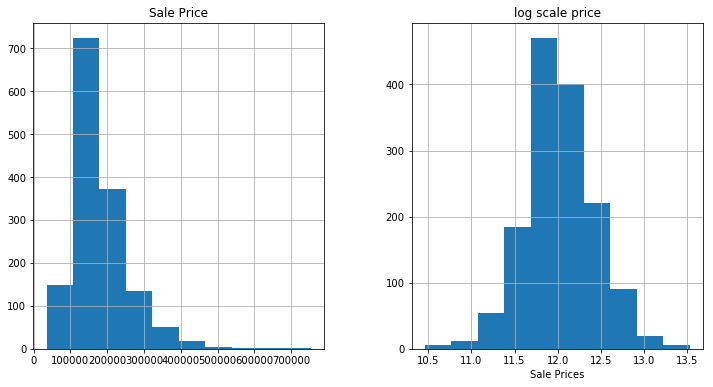

In [4]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
fig=plt.figure()
salePrice.hist()
plt.xlabel('Sale Prices')
plt.show()

Now we are done with the target feature.However, there are 80 other features in train_data frame.The following code will determine numeric features,identify highly skewed features  (skewness > 0.75) and take the logarithmic.

In [5]:
num_cols=train_data._get_numeric_data().columns # identifying numerical features

from scipy.stats import skew

skewed_feats_vals = train_data[num_cols].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats_highvals=skewed_feats_vals[skewed_feats_vals>0.75] # finding out features that are highly skewed

skewed_feats=skewed_feats_highvals.index

print("The identified skewed features:",skewed_feats)

The identified skewed features: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')


We alredy found the highly skewed features.Before applying logarithmic, it's required eliminate any null values.In this study, we will replace any null values with the mean values of the corresponding feature.(In part A, we deleted all the features with at least a missing value, knowing they are not necessary.However, in this study, we still don't)  

In [6]:
train_data=train_data.fillna(train_data.mean()) # replacing missing values with the mean value.

train_data[skewed_feats]=np.log1p(train_data[skewed_feats]) # apply logarithmic

# Preprocessing the data

Assigning target data into y_train vector

In [7]:
y_train=train_data['SalePrice']

Converting categorical fetures into dummy variables inorder to be consistant with requirements of sci-kit learn models.

In [8]:
train_data=pd.get_dummies(train_data)

After converting to dummy variables, list the new columns.

In [9]:
print('coulmns after using dummies',train_data.keys())

coulmns after using dummies Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)


Creating X data set by assigning all the features to x_train except 'SalePrice'.

In [10]:
x_train=(train_data.loc[:,'MSSubClass':'SaleCondition_Partial']).drop('SalePrice',1)

Splitting the data into training and testing sets.We use random_state=123 to randomize the data set.

In [11]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test =train_test_split(x_train,y_train,test_size=0.3,random_state=123)

C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Defining a method that calculates root mean square error (rmse) 

In [12]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

# Using models for predictions

We are going to use following models and find the best approach to predict the housing prices.

a) Ridge regularization

b) Lasso regularization

c) Random forest regressor


The following block of code will initialize both Ridge and Lasso models, predict the accuracy with alphas.This will help us to understabd the best alpha value (0r range) for each model. 

C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_para

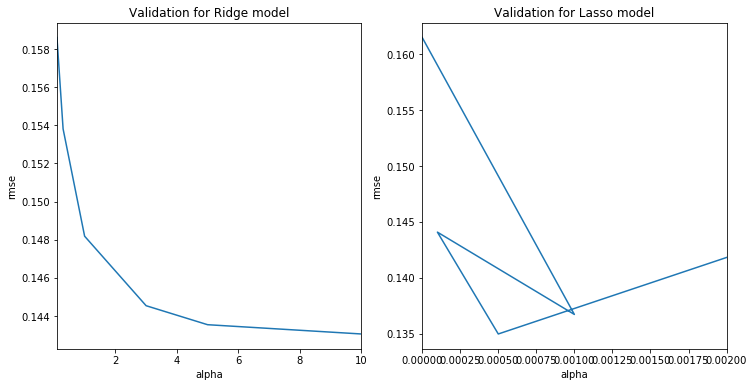

In [13]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV # importing the regularized models from sci-kit learn


# Behavior of  Ridge model with different alphas
#-----------------------------------------------
#-----------------------------------------------

fig=plt.figure()  
ax= fig.add_subplot(1,2,1) # initailizing two subplots (1 X 2) and selecting the 1st subplot.

model_ridge = Ridge()  # initializing the Ridge model
alphas = [ 0.1, 0.3, 1, 3, 5, 10] # choosing a range of alpha to check the best value.
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() # calculate rmse for each alpha
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation for Ridge model") # plot rmse vs corresponding aplhas
plt.xlabel("alpha")
plt.ylabel("rmse")

# Behavior of  Lasso model with different alphas
#-----------------------------------------------
#-----------------------------------------------


ax= fig.add_subplot(1,2,2) # selcting the 2nd subplot
model_lasso = Lasso()    # initializing Lasso model
alphas = [0,0.001,0.0001,0.0005,0.002]  # choosing a range of alpha to check the best value.
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() # calculate rmse for each alpha
            for alpha in alphas]
cv_ridge = pd.Series(cv_lasso, index = alphas)
cv_ridge.plot(title = "Validation for Lasso model") # plot rmse vs corresponding aplhas
plt.xlabel("alpha")
plt.ylabel("rmse")

plt.show()

Next we use RidgeCV and LassoCV to train and predict the cross validation accuracy in single step.The above two graphs provide good basis to input a sequence of alpha values to obtain the best prediction.

In [14]:
# Using RidgeCV() to predict the values.
#---------------------------------------
#---------------------------------------

alphs=[-1,0.00001,0.0001,0.0005,0.001,0.01,0.05,1,2,3,4,10,15,20]
model_ridge=RidgeCV(alphas=alphs).fit(X_train,y_train)
rmse= np.sqrt(-cross_val_score(model_ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_ridge=rmse.mean()
print('\nThe root mean square error (RMSE) for Ridge model:',rmse_ridge) # the rmse value with this model
print('The model ridge alpha value:',model_ridge.alpha_ ) # revealing the best alpha value, that was used 


# Using LassoCV() to predict the values.
#---------------------------------------
#---------------------------------------

alphs=[-1,0.00001,0.0001,0.0005,0.001,0.01,0.05,1,2,3,4,10,15,20]
model_lasso=LassoCV(alphas=alphs).fit(X_train,y_train)
rmse= np.sqrt(-cross_val_score(model_lasso, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_lasso=rmse.mean()
print('\nThe root mean square error (RMSE) for Lasso model:',rmse_lasso) # the rmse value with this model
print('The model lasso alpha value:',model_lasso.alpha_ )  # revealing the best alpha value, that was used 


The root mean square error (RMSE) for Ridge model: 0.145685632423
The model ridge alpha value: 10.0


C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You migh


The root mean square error (RMSE) for Lasso model: 0.136920020237
The model lasso alpha value: 0.001


The predictions (train and test data) are calculated separately from each model. 

In [15]:
y_train_pred_ridge=model_ridge.predict(X_train)
y_test_pred_ridge=model_ridge.predict(X_test)

y_train_pred_lasso=model_lasso.predict(X_train)
y_test_pred_lasso=model_lasso.predict(X_test)

Calculating r2 score (Coeficient of determination) for each model.

In [16]:
from sklearn.metrics import r2_score

print('\nR^2 train model Lasso:',r2_score(y_train,y_train_pred_lasso))
print('R^2 test model Lasso:', r2_score(y_test,y_test_pred_lasso))

print('\nR^2 train model Ridge:',r2_score(y_train,y_train_pred_ridge))
print('R^2 test model Ridge:', r2_score(y_test,y_test_pred_ridge))


R^2 train model Lasso: 0.920141358426
R^2 test model Lasso: 0.918793295445

R^2 train model Ridge: 0.928943158269
R^2 test model Ridge: 0.915634742869


Both models show impressive accuracy in their test data.Taking this study to the next level, random forest regressor will be tested as a potential predictive model.

In [17]:
from sklearn.ensemble import RandomForestRegressor

model_forest=RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
model_forest.fit(X_train,y_train)
y_train_pred_forest=model_forest.predict(X_train)
y_test_pred_forest=model_forest.predict(X_test)

print('\nR^2 train Random Forest Regressor:',r2_score(y_train,y_train_pred_forest))
print('R^2 test Random Forest Regressor:', r2_score(y_test,y_test_pred_forest))


R^2 train Random Forest Regressor: 0.981192571898
R^2 test Random Forest Regressor: 0.876973417613


# Final results

Although the training data has a higher fitting accuracy, the predictions on testing data is relatively lower.This may be due to the overfitting when training the model.

<html>
<body>

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Training accuracy</th> 
    <th>Testing accuracy</th>
  </tr>
  <tr>
    <td>Lasso model</td>
    <td>0.9201</td>
    <td>0.9187</td>
  </tr>
  <tr>
    <td>Ridge model</td>
    <td>0.9289</td>
    <td>0.9156</td>
  </tr>
  <tr>
    <td>Random forest</td>
    <td>0.9811</td>
    <td>0.8769</td>
  </tr>
    <tr>
    <td>Linear Regression</td>
    <td>0.7302</td>
    <td>0.7076</td>
  </tr>
</table>

</body>
</html>



It's clear that from the testing accuracy data, both Lasso and Ridge models demonstrate superioir results.We are going to use Lasso model to predict the values and visualize results using a residual plot.

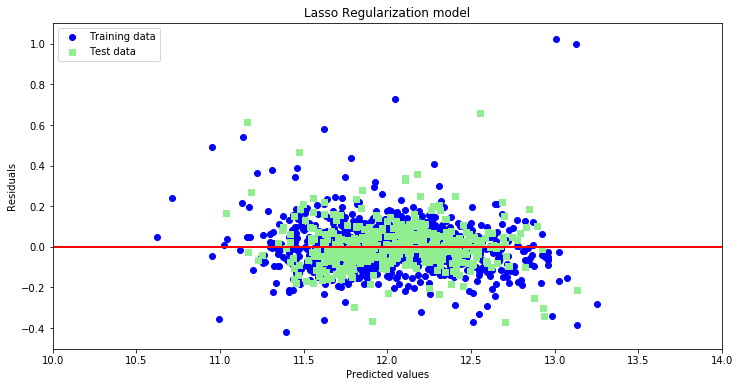

In [18]:
fig, ax =plt.subplots()

plt.scatter(y_train_pred_lasso,y_train_pred_lasso-y_train, c='blue',marker='o', label='Training data')# residuals of traing data in blue
plt.scatter(y_test_pred_lasso,y_test_pred_lasso-y_test, c='lightgreen',marker='s',label='Test data')# residuals of testing data in green

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Lasso Regularization model')
plt.hlines(y=0,xmin=10,xmax=14,lw=2,color='red') # plotting the y=0 line in red to indicate the residuals=0 reference.
plt.xlim([10,14])
plt.show()

The above figure demostrates better results than the Linear Regression method that we've used in part A.

# References

<html>
<body>

<ul style="list-style-type:disc">
 <p> <li>Raschka et al., 2015, Python Machine Learning, 1st Edition (https://www.amazon.com/Python-Machine-Learning-Sebastian-Raschka-ebook/dp/B00YSILNL0)</li> </p>
  
 <p> <li>Marcelino et al., 2017,Comprehensive data exploration with Python (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)</li></p>
  
  <p><li>Papiu et al., 2017,Regularized Linear Models (https://www.kaggle.com/apapiu/regularized-linear-models)</li></p>
</ul>  

</body>
</html>
